In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [6]:
x = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen']]
y = df['Channel']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
                     x, y, test_size=0.33, random_state=42)

In [8]:
print(x_train.shape)
print(y_train.shape)

(294, 7)
(294,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
## from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion="entropy",
                                    max_depth=6,
                                  random_state=17)

clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=17)

In [11]:
print("The arrays : " +str(x_train.columns))
print("The weight of attribtes : " + str(list(np.round(clf_tree.feature_importances_,4))))

The arrays : Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')
The weight of attribtes : [0.0, 0.0713, 0.0281, 0.0607, 0.0226, 0.8172, 0.0]


In [17]:
y_pred = clf_tree.predict(x_test)

In [18]:
y_test.shape

(146,)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_pred, y_test)

0.9041095890410958

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[95,  5],
       [ 9, 37]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred, y_test)

0.9134615384615384

In [23]:
recall_score(y_pred, y_test)

0.95

In [24]:
# To compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test)

0.9313725490196078

In [25]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [27]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [28]:
TrainX = df

In [29]:
non_categorical_data = TrainX.drop(['Channel','Region'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "Fresh": 4.55%
Outliers in "Milk": 6.36%
Outliers in "Grocery": 5.45%
Outliers in "Frozen": 9.77%
Outliers in "Detergents_Paper": 6.82%
Outliers in "Delicatessen": 6.14%


In [30]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicatessen        27
dtype: int64

In [31]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
imp_data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [32]:
imp_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,1033.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,1670.2
...,...,...,...,...,...,...
435,29703.0,12051.0,16027.0,1037.4,182.0,2204.0
436,9316.8,1431.0,764.0,4510.0,93.0,2346.0
437,14531.0,15488.0,15022.0,437.0,4944.2,1867.0
438,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [33]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
trainX=ms.fit_transform(imp_data)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9,random_state = 42)
pca.fit(trainX)
pc_names = ['PC_'+str(i) for i in range(1,len(pca.components_)+1)]
trainX = pd.DataFrame(pca.transform(trainX),columns = pc_names)

In [35]:
print(trainX.shape) # pca conversion
print(trainX.columns) # pca conversion columns

(440, 4)
Index(['PC_1', 'PC_2', 'PC_3', 'PC_4'], dtype='object')


In [37]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(trainX)

KMeans(n_clusters=5, random_state=0)

In [38]:
prediction=kmeans.fit_predict(trainX)

In [39]:
trainX['LABEL'] = prediction # pca data
imp_data['LABEL'] = prediction # continuous data
TrainX['LABEL'] = prediction # all data categorical and continuous

In [40]:
imp_data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen', 'LABEL'],
      dtype='object')

<AxesSubplot:ylabel='LABEL'>

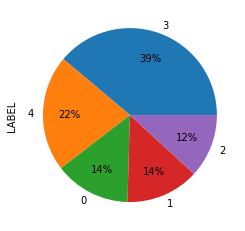

In [41]:
imp_data.LABEL.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [42]:
# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [43]:
print('Davis Bouldin Index : {0}'.format(davies_bouldin_score(trainX.loc[:,trainX.columns!='LABEL'],trainX['LABEL'])))

Davis Bouldin Index : 1.166873501065942


In [44]:
print('Silhouette Score : {0}'.format(silhouette_score(trainX.loc[:,trainX.columns!='LABEL'],trainX['LABEL'])))

Silhouette Score : 0.3006474478351189


In [49]:
#without PCA decompostion
print('Silhouette Score : {0}'.format(silhouette_score(imp_data.loc[:,imp_data.columns!='LABEL'],imp_data['LABEL'])))
print('Davis Bouldin Index : {0}'.format(davies_bouldin_score(imp_data.loc[:,imp_data.columns!='LABEL'],imp_data['LABEL'])))

Silhouette Score : 0.16815872013530236
Davis Bouldin Index : 1.8954670499933783


In [51]:
def spider_plot(data, title):
    means = data.groupby("LABEL").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi - 0.15 , num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

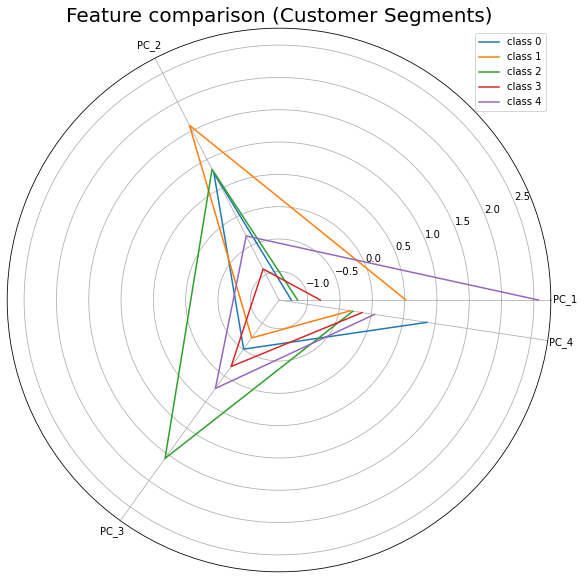

In [52]:
spider_plot(trainX , 'Customer Segments')

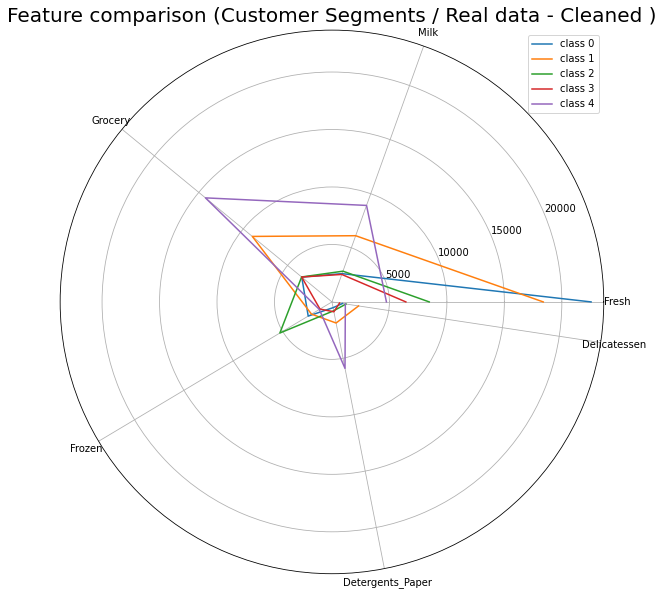

In [53]:
spider_plot(imp_data , 'Customer Segments / Real data - Cleaned ')

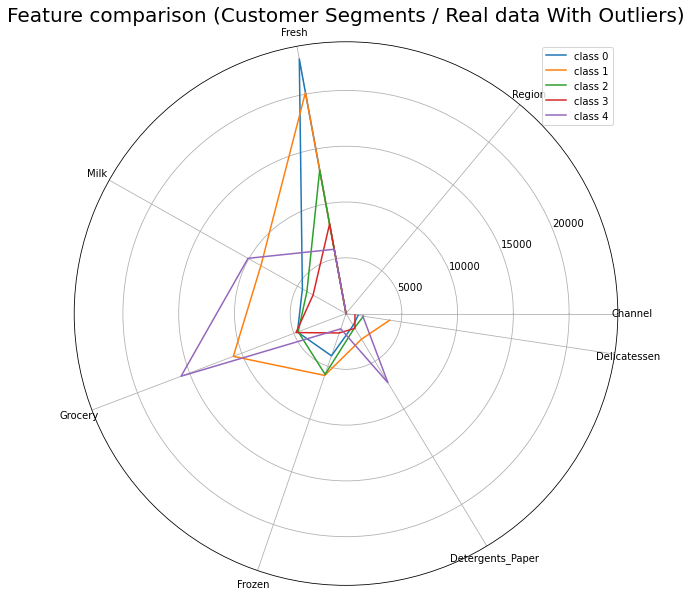

In [54]:
spider_plot(TrainX , 'Customer Segments / Real data With Outliers')

In [55]:
import seaborn as sns

In [56]:
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'y',
                       1 : 'g',
                       2 : 'm',
                       3 : 'k',
                       4 : 'c',
                       5: 'b'
                       
                       }
    plt.figure(figsize=(20,10))
    sns.violinplot(data=imp_data, x="Channel", y="Region", hue="LABEL", palette=LABEL_COLOR_MAP)

In [57]:
imp_data['Channel'] = TrainX['Channel']
imp_data['Region'] = TrainX['Region']

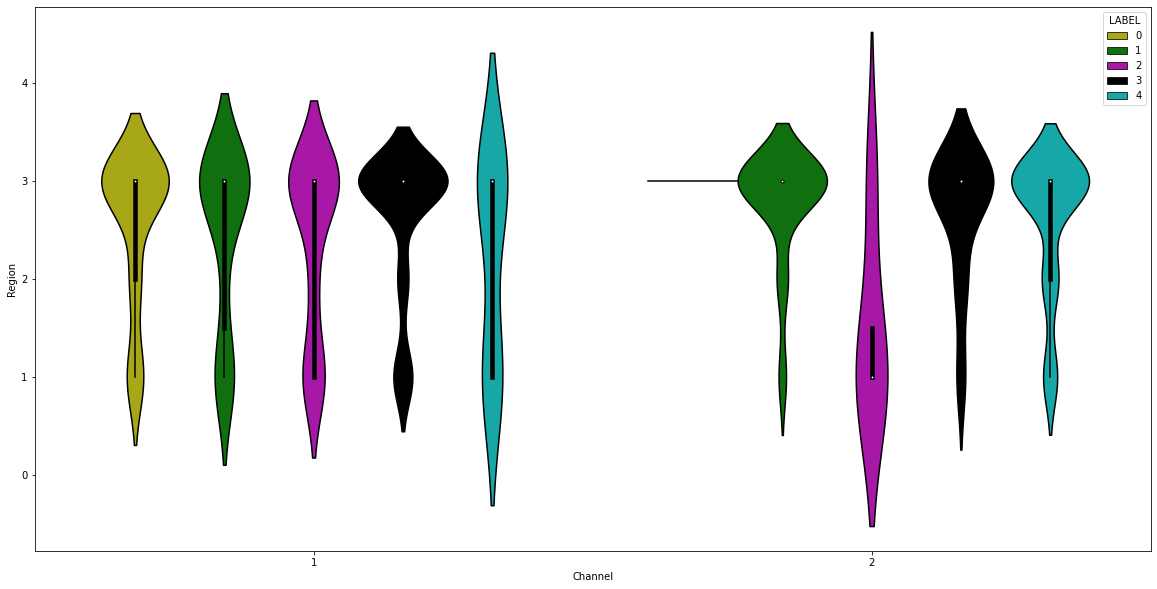

In [58]:
colorful_scatter(TrainX)

<AxesSubplot:xlabel='Channel', ylabel='Region'>

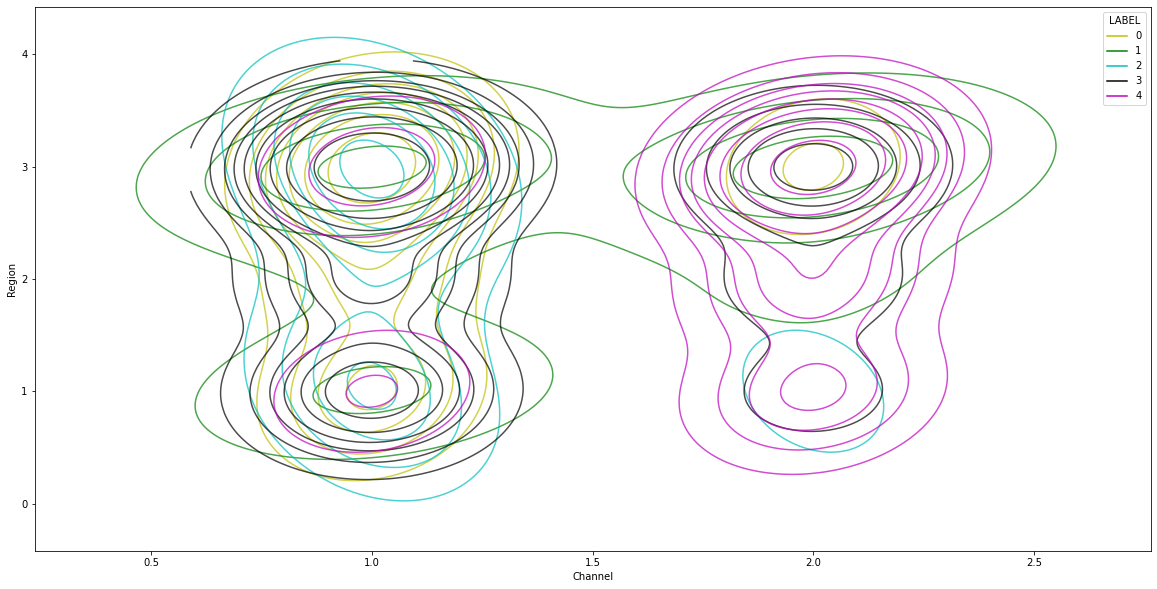

In [59]:
 plt.figure(figsize=(20,10))
sns.kdeplot(data=imp_data, x="Channel", y="Region", hue="LABEL", palette={0 : 'y', 1 : 'g', 2 : 'c', 3 : 'k', 4 : 'm', 5: 'r'}, alpha=.7, height=20)